# Project 2: Classification

## Introducing the Problem:
For this project I want to predict how quality of wine given certain physicochemical characteristics. To do this I will be using KNN to predict the quality on a scale of 0 to 10.

## Introducing the Dataset
Dataset: [https://archive.ics.uci.edu/dataset/186/wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)
I found this dataset on the UCI Machine Learning Repository. It has 11 feature variables that are used to predict the quality of the wine. The following are the feature variables:

- fixed acidity
- volatic aidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

### Install the following library to access the dataset

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# For loading the data
from ucimlrepo import fetch_ucirepo 

## Loading the Dataset

In [3]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets
df = pd.concat([X,y], axis=1)

In [4]:
df.shape

(6497, 12)

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Preprocessing
For this project I decided that there was no preprocessing I needed to perform on the data as the website that I got it off of said there was no empty rows/columns and no null values. I also decided that all of the variables were important for the classification so I will also not be removing any of those.


In [6]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Visualizations

### Variable Heatmap
With the amount of variables we have, we want to see the linear relationship between each category of the dataset. This allows us to see what columns are closely related and which ones aren't as closely related.

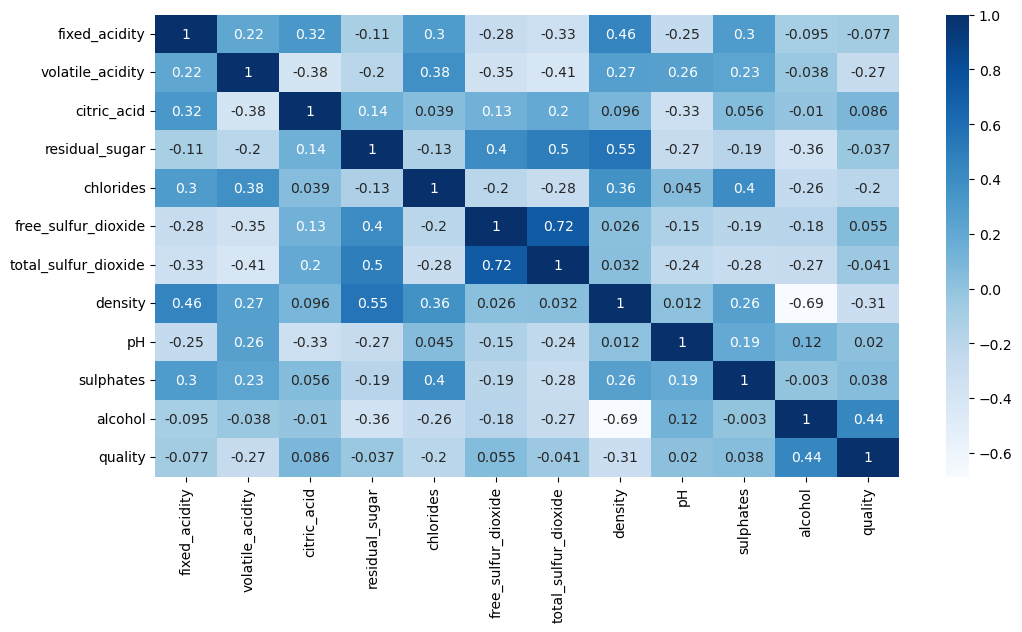

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

### Most Correlation
This shows us the 15 variables with the highest amount of correlation.

In [8]:
corr_matrix = df.corr()
positive_mask = corr_matrix > 0
positive_correlations = corr_matrix[positive_mask]
np.fill_diagonal(positive_correlations.values, np.nan)
positive_pairs = positive_correlations.stack().reset_index()
positive_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
positive_pairs = positive_pairs[positive_pairs['Variable 1'] < positive_pairs['Variable 2']]
positive_pairs = positive_pairs.sort_values('Correlation', ascending=False)
positive_pairs.head(15)

,Variable 1,Variable 2,Correlation
30,free_sulfur_dioxide,total_sulfur_dioxide,0.720934
40,density,residual_sugar,0.552517
20,residual_sugar,total_sulfur_dioxide,0.495482
37,density,fixed_acidity,0.458910
60,alcohol,quality,0.444319
29,free_sulfur_dioxide,residual_sugar,0.402871
27,chlorides,sulphates,0.395593
23,chlorides,volatile_acidity,0.377124
25,chlorides,density,0.362615
10,citric_acid,fixed_acidity,0.324436


### Least Correlated
Like the one above but showing the least correlated.

In [9]:
negative_mask = corr_matrix < 0
negative_correlations = corr_matrix[negative_mask]
np.fill_diagonal(negative_correlations.values, np.nan)
negative_pairs = negative_correlations.stack().reset_index()
negative_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
negative_pairs = negative_pairs[negative_pairs['Variable 1'] < negative_pairs['Variable 2']]
negative_pairs = negative_pairs.sort_values('Correlation', ascending=True)
negative_pairs.head(15)

,Variable 1,Variable 2,Correlation
58,alcohol,density,-0.686745
34,total_sulfur_dioxide,volatile_acidity,-0.414476
12,citric_acid,volatile_acidity,-0.377981
54,alcohol,residual_sugar,-0.359415
28,free_sulfur_dioxide,volatile_acidity,-0.352557
13,citric_acid,pH,-0.329808
2,fixed_acidity,total_sulfur_dioxide,-0.329054
41,density,quality,-0.305858
1,fixed_acidity,free_sulfur_dioxide,-0.282735
24,chlorides,total_sulfur_dioxide,-0.279630


### Distribution of Wine Quality Ratings
I included this to see where the distribution of the wine quality lies. This is important because if there are a significant amount of more values of others then your model may be more biased to certain values over others.

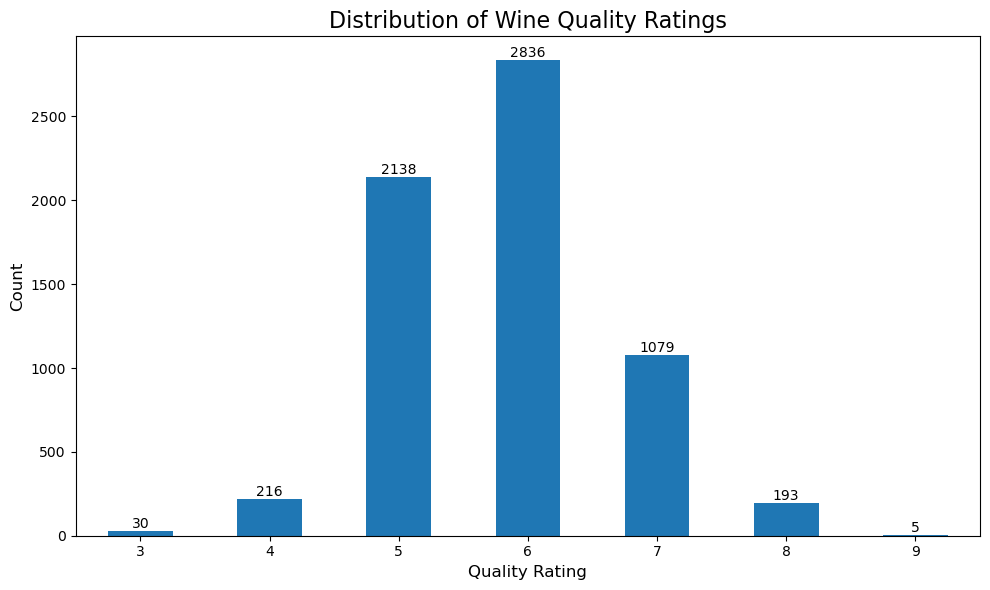

In [10]:
quality_counts = df['quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')

# Customize the chart
plt.title('Distribution of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on top of each bar
for i, v in enumerate(quality_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

## Model
As stated above I am using a K-Nearest Neighbors classifier algorithm. I have two different models, one where I am using the regular dataset and one where I used a scaled version of the dataset. To test the difference I have started with k = 5 to compare the two models.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.1, random_state=42)
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(X_test)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

## Evaluation

### Regular Dataset

#### Accuracy

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


#### Classification Report

In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.15      0.09      0.11        22
           5       0.44      0.57      0.50       192
           6       0.56      0.56      0.56       308
           7       0.42      0.31      0.35       108
           8       0.00      0.00      0.00        17

    accuracy                           0.49       650
   macro avg       0.26      0.25      0.25       650
weighted avg       0.47      0.49      0.47       650



C:\Users\dmana\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dmana\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dmana\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

#### Confusion Matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[  0   0   1   2   0   0]
 [  0   2  11   7   2   0]
 [  0   6 109  67  10   0]
 [  0   3 101 172  28   4]
 [  0   2  21  52  33   0]
 [  0   0   3   8   6   0]]


#### Cross-validation Scores

In [16]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.55128205 0.55042735 0.55859709 0.54918734 0.5508982 ]
Mean CV score: 0.55


#### Best value of K

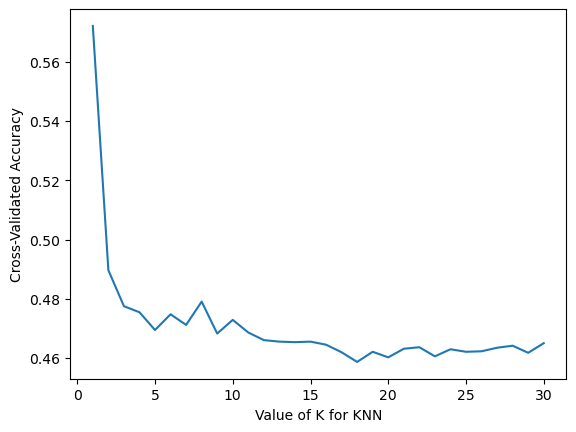

In [17]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### Model with Opimized K

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Accuracy: 0.58

Classification Report:
              precision    recall  f1-score   support

           3       0.33      0.33      0.33         3
           4       0.26      0.23      0.24        22
           5       0.56      0.62      0.59       192
           6       0.66      0.61      0.64       308
           7       0.53      0.55      0.54       108
           8       0.29      0.29      0.29        17

    accuracy                           0.58       650
   macro avg       0.44      0.44      0.44       650
weighted avg       0.58      0.58      0.58       650


Confusion Matrix:
[[  1   1   0   1   0   0]
 [  1   5   5   9   2   0]
 [  1   5 120  51  14   1]
 [  0   6  77 188  33   4]
 [  0   2  10  30  59   7]
 [  0   0   3   5   4   5]]

Cross-validation scores: [0.56752137 0.56495726 0.57313944 0.56544055 0.58939264]
Mean CV score: 0.57


### Scaled

#### Accuracy

In [19]:
accuracy = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


#### Classification Report

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))


Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.33      0.14      0.19        22
           5       0.54      0.64      0.59       192
           6       0.59      0.60      0.59       308
           7       0.49      0.43      0.46       108
           8       0.17      0.06      0.09        17

    accuracy                           0.55       650
   macro avg       0.44      0.36      0.39       650
weighted avg       0.54      0.55      0.54       650



#### Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred_scaled)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[  1   0   1   1   0   0]
 [  1   3  10   6   2   0]
 [  0   3 122  62   5   0]
 [  0   3  84 184  34   3]
 [  0   0   8  52  46   2]
 [  0   0   0   9   7   1]]


#### Cross-validation Score

In [22]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.5982906  0.61880342 0.60992301 0.61420017 0.62360992]
Mean CV score: 0.61


#### Best value of K

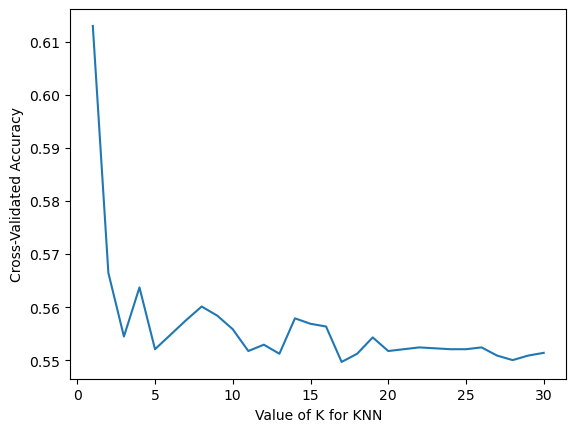

In [23]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### Model with Optimized K

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))

cm = confusion_matrix(y_test, y_pred_scaled)
print("\nConfusion Matrix:")
print(cm)

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.32      0.41      0.36        22
           5       0.62      0.68      0.65       192
           6       0.70      0.64      0.67       308
           7       0.63      0.62      0.62       108
           8       0.23      0.29      0.26        17

    accuracy                           0.63       650
   macro avg       0.50      0.50      0.49       650
weighted avg       0.64      0.63      0.63       650


Confusion Matrix:
[[  1   0   1   1   0   0]
 [  1   9   6   6   0   0]
 [  0   8 130  46   8   0]
 [  0  11  64 196  28   9]
 [  0   0   7  26  67   8]
 [  0   0   2   6   4   5]]

Cross-validation scores: [0.5982906  0.61880342 0.60992301 0.61420017 0.62360992]
Mean CV score: 0.61


## Storytelling and Impact
One thing I've learned from this project is that for certain machine learning algorithms like KNN it is better to scale your data. I also learned that for my model the best k-value is k=1. This is where the metrics are the greatest. I think provided a better dataset with and even amount of values across all qualities of wine the metrics of my model would be better. Another thing that I think the dataset suffers from is possible bias as the quality of the win is a sensory or subjective rating

This model could have a major impact on the wine and alcohol industry because it would allow distillers to produce better quality alcohol or alcohol of any quality that they think people would buy.  1]]